In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
study_folder = r"C:\Users\Tobias\Documents\Masterarbeit_lokal\ParamStudies\Distance_3cams_rotY360"

PSets_Info = pd.read_csv(Path(study_folder) / "ParameterSet.csv")
PSets_Eval = pd.read_csv(Path(study_folder) / "EvaluationParameterStudy.csv")

In [3]:
PSets_Eval

,Scaling_median,Scaling_std,Mesh2MeshDist_mean,Mesh2MeshDist_std,volume_ref,volume_rec,surface_ref,surface_rec,sphericity_ref,sphericity_rec,cam_mean_abs_error,cam_std_abs_error,cam_mean_rel_error,cam_std_rel_error,cam_outliers,cam_threshold,rec_cams,images,quality_index
0,0.151049,0.000014,7.342300e-06,0.000041,0.000011,0.000011,0.003591,0.003425,0.671746,0.703093,0.000158,0.000042,0.001056,0.000283,0.0,0.01,27,33,2
1,0.151051,0.000012,1.014360e-06,0.000038,0.000011,0.000011,0.003591,0.003434,0.671746,0.702998,0.000146,0.000037,0.000973,0.000246,0.0,0.01,27,33,1
2,0.151050,0.000012,8.449250e-06,0.000041,0.000011,0.000011,0.003591,0.003428,0.671746,0.702741,0.000195,0.000056,0.001297,0.000375,0.0,0.01,27,33,2
3,0.201480,0.000012,8.921460e-06,0.000043,0.000011,0.000011,0.003591,0.003432,0.671746,0.703284,0.000106,0.000021,0.000528,0.000104,0.0,0.01,33,36,2
4,0.201480,0.000012,7.463760e-06,0.000043,0.000011,0.000011,0.003591,0.003432,0.671746,0.703355,0.000159,0.000046,0.000795,0.000228,0.0,0.01,33,36,2
5,0.201482,0.000011,7.714630e-06,0.000043,0.000011,0.000011,0.003591,0.003432,0.671746,0.703769,0.000165,0.000037,0.000823,0.000183,0.0,0.01,33,36,2
6,0.301747,0.000061,5.449350e-06,0.000063,0.000011,0.000011,0.003591,0.003405,0.671746,0.709695,0.000334,0.000173,0.001114,0.000576,0.0,0.01,47,54,2
7,0.301759,0.000043,7.042470e-06,0.000062,0.000011,0.000011,0.003591,0.003407,0.671746,0.709532,0.000372,0.000216,0.001240,0.000721,0.0,0.01,47,54,2
8,0.301755,0.000058,7.152980e-06,0.000062,0.000011,0.000011,0.003591,0.003404,0.671746,0.709710,0.000333,0.000302,0.001109,0.001007,0.0,0.01,47,54,2
9,0.402626,0.000145,5.468390e-06,0.000087,0.000011,0.000011,0.003591,0.003389,0.671746,0.717806,0.001738,0.000233,0.004345,0.000583,0.0,0.01,64,69,2


Berechne Fehler in den morphologischen Größen und füge sie dem Evaluierungsdatensatz hinzu

In [4]:
sphericity_error_perc = (PSets_Eval["sphericity_rec"] - PSets_Eval["sphericity_ref"]) / PSets_Eval["sphericity_ref"]*100
vol_error_perc = (PSets_Eval["volume_rec"] - PSets_Eval["volume_ref"]) / PSets_Eval["volume_ref"]*100
PSets_Eval["sphericity_error_perc"] = sphericity_error_perc; PSets_Eval["vol_error_perc"] = vol_error_perc; 

Berechne die Positionsfehlerquote

In [5]:
r_PFQ_perc  = PSets_Eval["cam_outliers"] / PSets_Eval["rec_cams"] *100
PSets_Eval["r_PFQ_perc"] = r_PFQ_perc; 

Verkleinerer den Evaluierungsdatensatz auf die relevanten Größen

In [6]:
PSets_Eval["cam_mean_error_perc"]  = PSets_Eval["cam_mean_rel_error"]*100
PSets_Eval_small = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc"]]
PSets_Eval_small_qual = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc","quality_index"]]
PSets_Info_small = PSets_Info[["cam_distance","reps"]]

Erstelle einen wesentlichen Gesamtdatensatz

In [7]:
PSets_Bundle = pd.concat([PSets_Info_small,PSets_Eval_small],axis=1)

Plotte Auswertungsgröße über die varrierten Größe

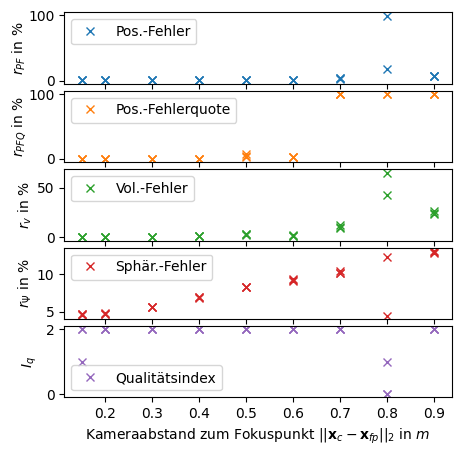

In [8]:
PSets_Eval_small_qual.index = PSets_Info_small["cam_distance"]

axes = PSets_Eval_small_qual.plot(subplots=True, figsize=(5, 5), style='x')
#plt.xticks([2, 3, 4, 5, 6])
plt.xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")
axes[0].legend(["Pos.-Fehler"]); axes[0].set_ylabel("$r_{PF}$ in %",labelpad=0)
axes[1].legend(["Pos.-Fehlerquote"]); axes[1].set_ylabel("$r_{PFQ}$ in %",labelpad=0)
axes[2].legend(["Vol.-Fehler"]); axes[2].set_ylabel("$r_{v}$ in %",labelpad = 2)
axes[3].legend(["Sphär.-Fehler"]); axes[3].set_ylabel("$r_\Psi$ in %",labelpad=2)
axes[4].legend(["Qualitätsindex"]); axes[4].set_ylabel("$I_q$",labelpad=5)
plt.subplots_adjust(hspace=0.1)
plt.savefig("distance_eval_5subplots.svg", format="svg")
plt.show()


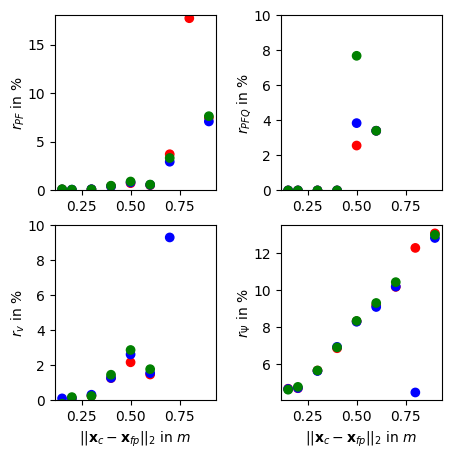

In [9]:
PSets_Eval_small.index = PSets_Info_small["cam_distance"]
# Farbzuordnung basierend auf reps
color_map = {1: 'red', 2: 'blue', 3: 'green'}
colors = PSets_Info_small["reps"].map(color_map)

# Titel für die einzelnen Subplots
title = ["Positionsfehler", "Positionsfehlerquote", "Volumenfehler", "Sphärizitätsfehler"]
labels = ["$r_{PF}$ in %","$r_{PFQ}$ in %","$r_{v}$ in %","$r_\Psi$ in %"]

# Erstelle 2x2 Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))  # Größere Größe für 2x2 Layout

# Spaltennamen aus dem DataFrame
columns = PSets_Eval_small.columns

# Anpassungen für Schriftgröße
font_size = 10

# Iteriere über die Spalten und Plots
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Umrechnung für 2x2-Layout
    ax.scatter(PSets_Eval_small.index, PSets_Eval_small[column], color=colors)
    #ax.set_title(title[i], fontsize=font_size)
    if i >= len(columns)-2: ax.set_xlabel("$||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$", fontsize=font_size)
    ax.set_ylabel(labels[i], fontsize=font_size,labelpad=0)  # Anpassung der Y-Achsenbeschriftung
    #ax.set_xticks([2,3,4,5,6])
    if i == 3: break

# Passe die Schriftgröße der Ticks an
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Passe den Platz zwischen den Subplots an
plt.subplots_adjust(hspace=0.2, wspace=0.4)

axes[0, 0].set_ylim([0, 18])
axes[0, 1].set_ylim([0, 10])
axes[1, 0].set_ylim([0, 10])

# Plot anzeigen
plt.show()


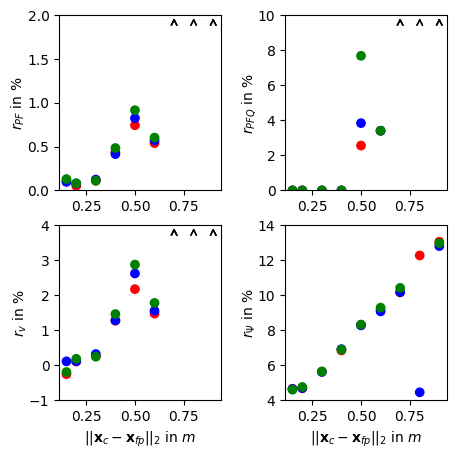

In [10]:
import matplotlib.pyplot as plt

# Farbzuordnung basierend auf reps
color_map = {1: 'red', 2: 'blue', 3: 'green'}
colors = PSets_Info_small["reps"].map(color_map)

# Titel für die einzelnen Subplots
title = ["Positionsfehler", "Positionsfehlerquote", "Volumenfehler", "Sphärizitätsfehler"]
labels = ["$r_{PF}$ in %", "$r_{PFQ}$ in %", "$r_{v}$ in %", "$r_\Psi$ in %"]

# Erstelle 2x2 Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))  # Größere Größe für 2x2 Layout

# Spaltennamen aus dem DataFrame
columns = PSets_Eval_small.columns

# Anpassungen für Schriftgröße
font_size = 10

# Definierte y-Limits für die einzelnen Subplots
y_limits = [(0, 2), (0, 10), (-1, 4), (4, 14)]  # Beispielgrenzen für jedes Subplot

# Iteriere über die Spalten und Plots
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Umrechnung für 2x2-Layout
    ax.scatter(PSets_Eval_small.index, PSets_Eval_small[column], color=colors)
    
    # Setze die y-Limits für den jeweiligen Subplot
    y_limit = y_limits[i]
    ax.set_ylim(y_limit)
    
    # Prüfe auf Werte über dem oberen y-Limit und füge Pfeile hinzu
    above_limit = PSets_Eval_small[PSets_Eval_small[column] > y_limit[1]]
    for x_pos, y_val in zip(above_limit.index, above_limit[column]):
        ax.annotate(
            '', 
            xy=(x_pos, y_limit[1]), xycoords='data',  # Endpunkt des Pfeils auf y-Grenze
            xytext=(x_pos, y_limit[1] - (0.05 * (y_limit[1] - y_limit[0]))), textcoords='data',  # Startpunkt des Pfeils knapp darunter
            arrowprops=dict(facecolor='black', arrowstyle='->')
        )

    # Prüfe auf Werte unter dem unteren y-Limit und füge Pfeile hinzu
    below_limit = PSets_Eval_small[PSets_Eval_small[column] < y_limit[0]]
    for x_pos, y_val in zip(below_limit.index, below_limit[column]):
        ax.annotate(
            '', 
            xy=(x_pos, y_limit[0]), xycoords='data',  # Endpunkt des Pfeils auf unterem y-Grenze
            xytext=(x_pos, y_limit[0] + (0.05 * (y_limit[1] - y_limit[0]))), textcoords='data',  # Startpunkt des Pfeils knapp darüber
            arrowprops=dict(facecolor='black', arrowstyle='->')
        )

    # Anpassungen der Achsenbeschriftungen
    if i >= len(columns) - 2:
        ax.set_xlabel("$||\\mathbf{x}_{c} - \\mathbf{x}_{fp}||_2$ in $m$", fontsize=font_size)
    ax.set_ylabel(labels[i], fontsize=font_size, labelpad=0)

# Passe die Schriftgröße der Ticks an
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Passe den Platz zwischen den Subplots an
plt.subplots_adjust(hspace=0.2, wspace=0.4)

# Plot anzeigen und speichern
plt.savefig("distance_eval_4subplots.svg", format="svg")
plt.show()



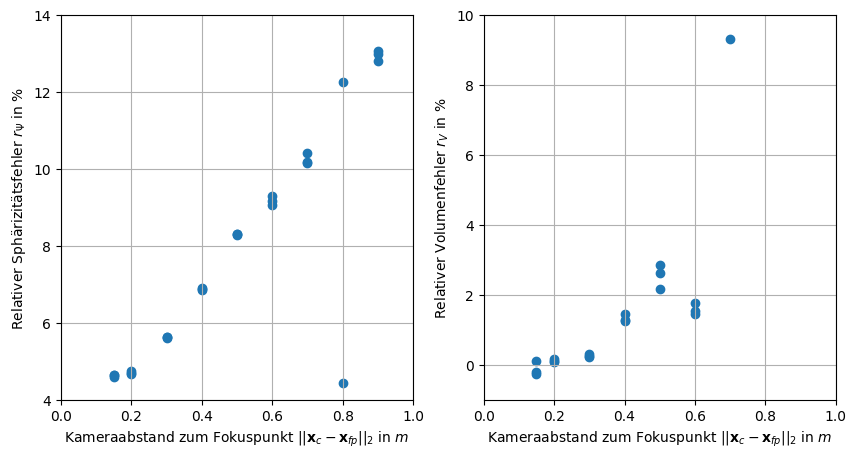

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].scatter(PSets_Bundle["cam_distance"], PSets_Bundle["sphericity_error_perc"], marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")
ax[0].set_ylabel("Relativer Sphärizitätsfehler $r_\Psi$ in %")
ax[0].set_xlim([0,1])
ax[0].set_ylim([4,14])

ax[1].scatter(PSets_Bundle["cam_distance"], PSets_Bundle["vol_error_perc"], marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")
ax[1].set_ylabel("Relativer Volumenfehler $r_V$ in %")
ax[1].set_xlim([0,1])
ax[1].set_ylim([-1,10])
plt.show()


Laufzeitanalyse

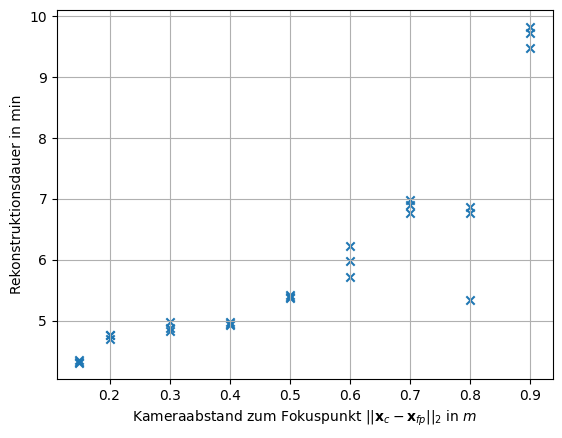

In [12]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Info_small["cam_distance"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

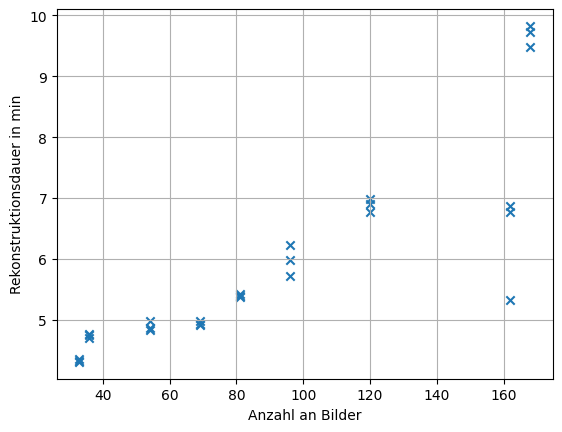

In [13]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Anzahl an Bilder")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

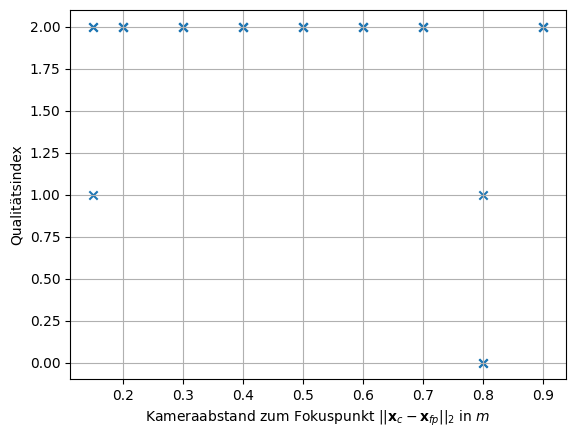

In [14]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Info_small["cam_distance"],PSets_Eval["quality_index"],marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")  # Beschriftung der x-Achse
ax.set_ylabel("Qualitätsindex")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

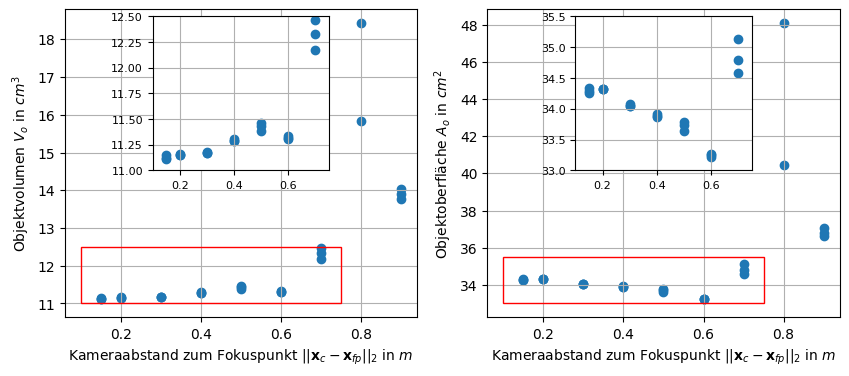

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Parameter für die Größe der Inset-Diagramme
inset_width = "50%"   # Breite der Inset-Diagramme
inset_height = "50%"  # Höhe der Inset-Diagramme

# Parameter für die x- und y-Bereiche der Inset-Diagramme
inset_x_range_vol = (0.1, 0.75)       # x-Bereich für das Inset-Diagramm - Objektvolumen
inset_y_range_vol = (11, 12.5)   # y-Bereich für das Inset-Diagramm - Objektvolumen
inset_x_range_surf = (0.1, 0.75)      # x-Bereich für das Inset-Diagramm - Objektoberfläche
inset_y_range_surf = (33, 35.5)    # y-Bereich für das Inset-Diagramm - Objektoberfläche

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Hauptplot für Objektvolumen - zeigt gesamten Wertebereich
ax[0].scatter(PSets_Bundle["cam_distance"], PSets_Eval["volume_rec"] * 10**6, marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Kameraabstand zum Fokuspunkt $||\\mathbf{x}_{c} - \\mathbf{x}_{fp}||_2$ in $m$")
ax[0].set_ylabel("Objektvolumen $V_o$ in $cm^3$")
# ax[0].set_xlim([min(PSets_Bundle["cam_distance"]), max(PSets_Bundle["cam_distance"])])
# ax[0].set_ylim([min(PSets_Eval["volume_rec"]) * 10**6, max(PSets_Eval["volume_rec"]) * 10**6])

# Inset-Plot für eingeschränkten Bereich - Objektvolumen
inset_ax0 = inset_axes(ax[0], width=inset_width, height=inset_height, loc="upper center")
inset_ax0.scatter(PSets_Bundle["cam_distance"], PSets_Eval["volume_rec"] * 10**6, marker='o')
inset_ax0.grid(True)
inset_ax0.set_xlim(inset_x_range_vol)  # Eingeschränkter x-Bereich
inset_ax0.set_ylim(inset_y_range_vol)  # Eingeschränkter y-Bereich
inset_ax0.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektvolumen
rect0 = patches.Rectangle((inset_x_range_vol[0], inset_y_range_vol[0]),
                          inset_x_range_vol[1] - inset_x_range_vol[0],
                          inset_y_range_vol[1] - inset_y_range_vol[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[0].add_patch(rect0)

# Hauptplot für Objektoberfläche - zeigt gesamten Wertebereich
ax[1].scatter(PSets_Bundle["cam_distance"], PSets_Eval["surface_rec"] * 10**4, marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Kameraabstand zum Fokuspunkt $||\\mathbf{x}_{c} - \\mathbf{x}_{fp}||_2$ in $m$")
ax[1].set_ylabel("Objektoberfläche $A_o$ in $cm^2$")
# ax[1].set_xlim([min(PSets_Bundle["cam_distance"]), max(PSets_Bundle["cam_distance"])])
# ax[1].set_ylim([min(PSets_Eval["surface_rec"]) * 10**4, max(PSets_Eval["surface_rec"]) * 10**4])

# Inset-Plot für eingeschränkten Bereich - Objektoberfläche
inset_ax1 = inset_axes(ax[1], width=inset_width, height=inset_height, loc="upper center")
inset_ax1.scatter(PSets_Bundle["cam_distance"], PSets_Eval["surface_rec"] * 10**4, marker='o')
inset_ax1.grid(True)
inset_ax1.set_xlim(inset_x_range_surf)  # Eingeschränkter x-Bereich
inset_ax1.set_ylim(inset_y_range_surf)  # Eingeschränkter y-Bereich
inset_ax1.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektoberfläche
rect1 = patches.Rectangle((inset_x_range_surf[0], inset_y_range_surf[0]),
                          inset_x_range_surf[1] - inset_x_range_surf[0],
                          inset_y_range_surf[1] - inset_y_range_surf[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[1].add_patch(rect1)
plt.savefig("volume_and_surface.svg")
plt.show()

